In [1]:
from dataloader import get_loaders_heatmaps, get_loaders_masks
import torch
import FILE_PATHS
import matplotlib.pyplot as plt
import numpy as np
from visualization import show_frame_from_torch_tensor, show_mask_from_torch_tensor, show_n_channel_image_tensor

# transformations
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [17]:
LEARNING_RATE = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 32
NUM_EPOCHS = 12
NUM_WORKERS = 4
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
PIN_MEMORY = True
LOAD_MODEL = False

In [3]:
train_transforms = A.Compose(
    [
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        # A.Rotate(limit=35, p=1.0),
        # A.HorizontalFlip(p=0.5),
        # A.VerticalFlip(p=0.1),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ],
)

val_transforms = A.Compose(
    [
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ],
)

# Masks loader

In [18]:
train_loader_masks, val_loader_maks = get_loaders_masks(
    FILE_PATHS.IMAGES,
    FILE_PATHS.MASKS,
    BATCH_SIZE,
    train_transforms,
    val_transforms,
    NUM_WORKERS,
    test_size=0.2,
    seed=42,
)

TRAIN PATHS LENGTHS: images, masks
16, 16
VALIDATION PATHS LENGTHS: images, masks
4, 4


In [5]:
masks_batch = next(iter(train_loader_masks))

In [22]:
for i, data in enumerate(train_loader_masks):
    print(i)
    print(data["image"]["data"].shape)
    print(data["mask"]["data"].shape)
    print()

0
torch.Size([16, 3, 112, 112])
torch.Size([16, 112, 112])



File: ../EchoNet-Dynamic/data/images\0X1A2C60147AF9FDAE_46.png


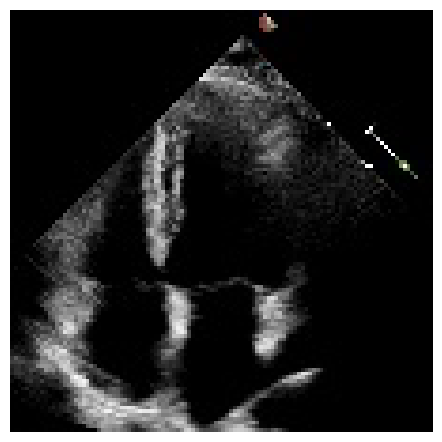

In [6]:
sample_image_masks = masks_batch["image"]["data"][0]
print("File:", masks_batch["image"]["filename"][0])
show_frame_from_torch_tensor(sample_image_masks)

File: ../EchoNet-Dynamic/data/masks\0X1A2C60147AF9FDAE_46.png


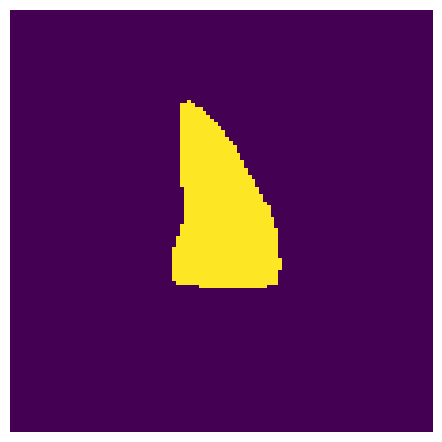

In [14]:
sample_mask_masks = masks_batch["mask"]["data"][0]
print("File:", masks_batch["mask"]["filename"][0])
show_mask_from_torch_tensor(sample_mask_masks)

# Heatmaps loader

In [8]:
train_loader_heatmaps, val_loader_heatmaps = get_loaders_heatmaps(
    FILE_PATHS.IMAGES,
    f"{FILE_PATHS.HEATMAPS}/gaussian",
    FILE_PATHS.MASKS,
    BATCH_SIZE,
    train_transforms,
    val_transforms,
    NUM_WORKERS,
    test_size=0.2,
    seed=42,
)

TRAIN PATHS LENGTHS: images, masks, heatmaps
16, 16, 16
VALIDATION PATHS LENGTHS: images, masks, heatmaps
4, 4, 4


In [9]:
heatmaps_batch = next(iter(train_loader_heatmaps))

In [23]:
for i, data in enumerate(train_loader_heatmaps):
    print(i)
    print(data["image"]["data"].shape)
    print(data["heatmap"]["data"].shape)
    print(data["mask"]["data"].shape)
    print()

0
torch.Size([16, 3, 112, 112])
torch.Size([16, 7, 112, 112])
torch.Size([16, 112, 112])



File: ../EchoNet-Dynamic/data/images\0X1A3E7BF1DFB132FB_73.png


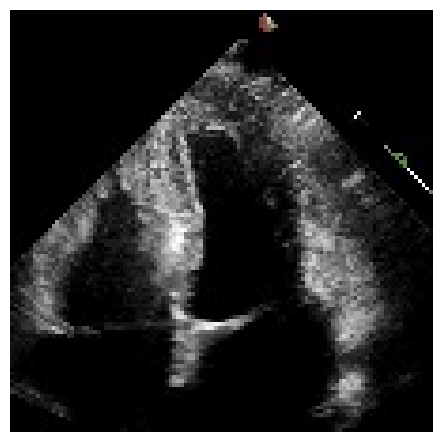

In [10]:
sample_image_heatmaps = heatmaps_batch["image"]["data"][0]
print("File:", heatmaps_batch["image"]["filename"][0])
show_frame_from_torch_tensor(sample_image_heatmaps)

File: ../EchoNet-Dynamic/data/masks\0X1A3E7BF1DFB132FB_73.png


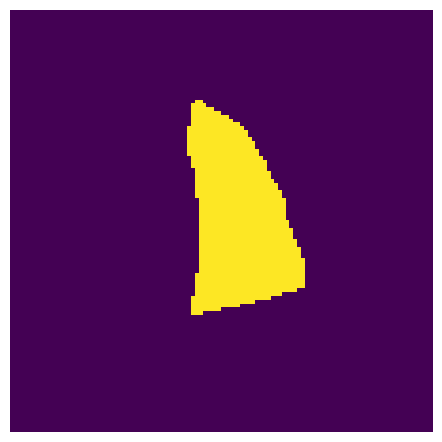

In [11]:
sample_mask_hatmap = heatmaps_batch["mask"]["data"][0]
print("File:", heatmaps_batch["mask"]["filename"][0])
show_mask_from_torch_tensor(sample_mask_hatmap)

File: ../EchoNet-Dynamic/data/heatmaps/gaussian\0X1A3E7BF1DFB132FB_73pt


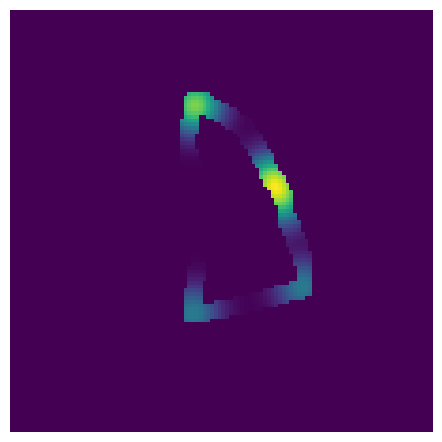

In [12]:
sample_heatmap_heatmap = heatmaps_batch["heatmap"]["data"][0]
print("File:", heatmaps_batch["heatmap"]["filename"][0])
show_n_channel_image_tensor(sample_heatmap_heatmap)